In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [17]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [7]:
df = pd.read_csv("/content/drive/MyDrive/praktikum_ml/praktikum07/data/dataset_satelit.csv")


# Explorasi data
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Shape: (594, 34)

First 5 rows:
   No   Longitude  Lattitude     N     P      K    Ca    Mg      Fe      Mn  \
0   1  103.036658  -0.604417  2.64  0.15  0.415  0.51  0.31  119.96  463.23   
1   2  103.037201  -0.604689  2.75  0.17  0.568  0.76  0.58  102.63  493.81   
2   3  103.036359  -0.603012  1.77  0.12  0.339  0.49   0.6  107.37  460.93   
3   4  103.036950  -0.603219  2.30  0.15  0.460  0.74  0.67   96.02  338.17   
4   5  103.036802  -0.601969  2.05  0.14  0.308  0.64  0.72   87.01  384.33   

   ...      b1  Sigma_VV  Sigma_VH      plia       lia      iafe  gamma0_vv  \
0  ...  0.0433   0.18183   0.04461  35.74446  35.79744  35.41161    0.22331   
1  ...  0.0465   0.22079   0.04640  35.12096  35.14591  35.41510    0.27116   
2  ...  0.0417   0.18926   0.03992  35.07724  35.07730  35.41135    0.23242   
3  ...  0.0367   0.14769   0.03622  36.08078  36.08469  35.41583    0.18138   
4  ...  0.0361   0.18205   0.03797  32.68855  32.69293  35.41592    0.22359   

   gamma0_

In [8]:
# Cek missing values
print("Missing Values:")
print(df.isnull().sum())

# Handle missing values - drop rows dengan missing values
df_clean = df.dropna()

print(f"Original shape: {df.shape}")
print(f"After cleaning: {df_clean.shape}")

# Pilih variabel untuk analisis
# Variabel dependen: N (Nitrogen)
# Variabel independen: P, K, Ca, Mg, Fe, dan beberapa band satelit

target = 'N'
features = ['P', 'K', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn', 'B',
           'Sigma_VV', 'Sigma_VH', 'b1', 'b2', 'b3', 'b4', 'b5']

print(f"Target variable: {target}")
print(f"Features: {features}")

Missing Values:
No           0
Longitude    0
Lattitude    0
N            0
P            0
K            1
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
b12          0
b11          0
b9           0
b8a          0
b8           0
b7           0
b6           0
b5           0
b4           0
b3           0
b2           0
b1           0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
beta0_vv     0
beta0_vh     0
dtype: int64
Original shape: (594, 34)
After cleaning: (593, 34)
Target variable: N
Features: ['P', 'K', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn', 'B', 'Sigma_VV', 'Sigma_VH', 'b1', 'b2', 'b3', 'b4', 'b5']


Memastikan data bersih dan numerik...
Data analysis shape: (592, 34)

Membuat Correlation Matrix...


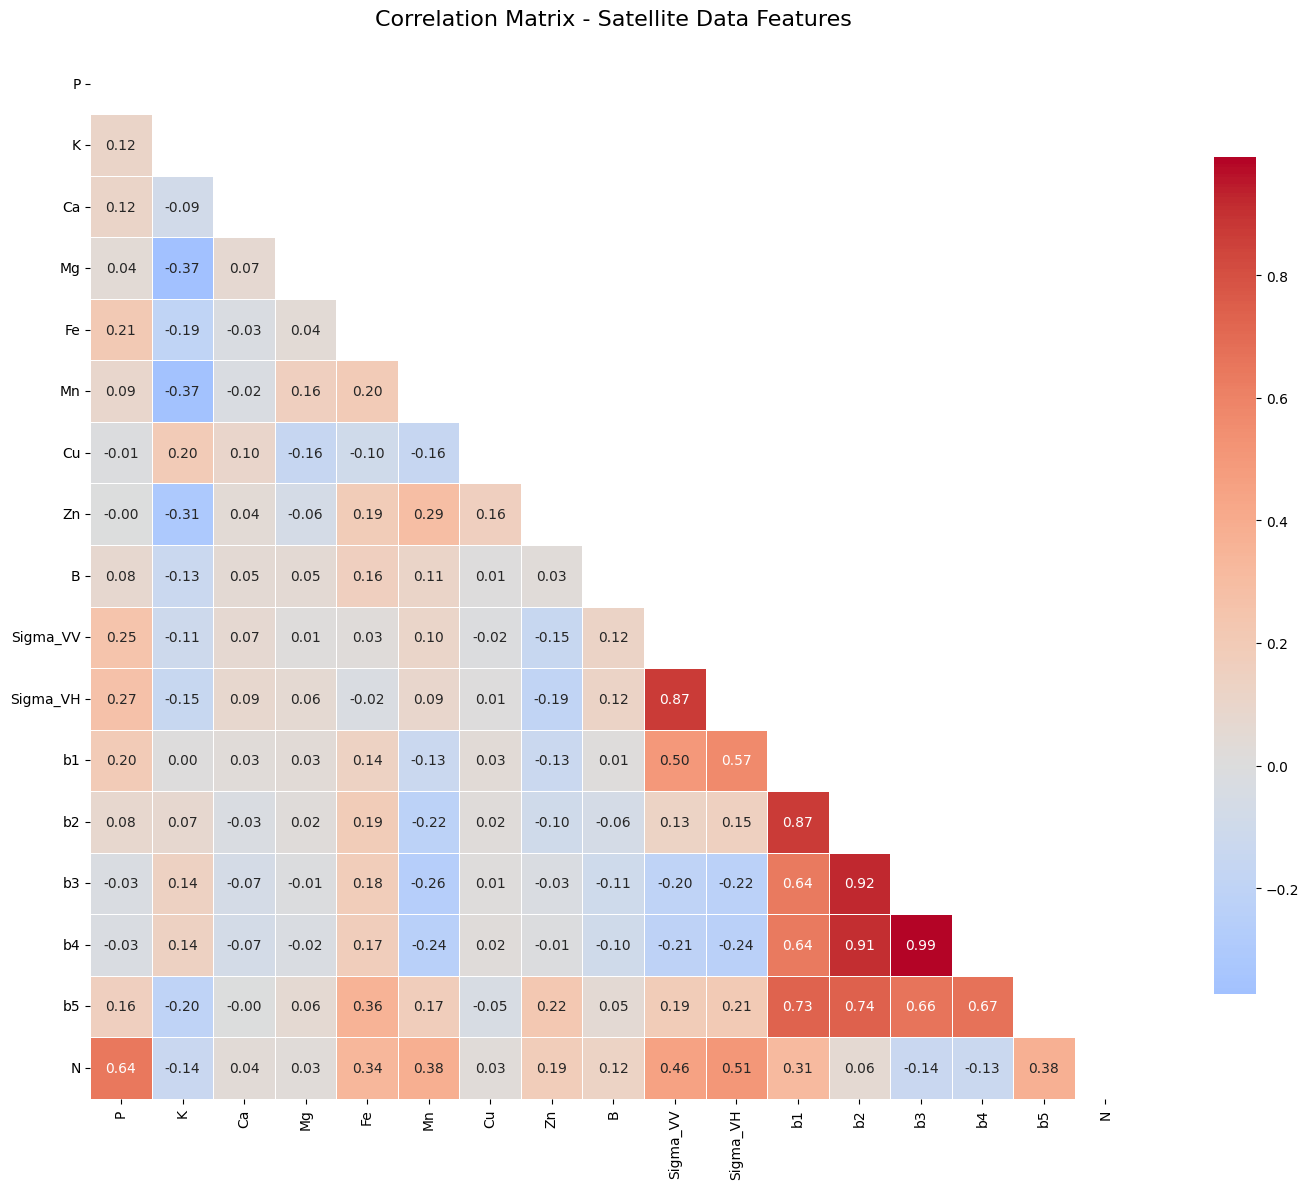


Korelasi dengan Nitrogen (N):
  P: 0.644
  Sigma_VH: 0.506
  Sigma_VV: 0.458
  Mn: 0.385
  b5: 0.377
  Fe: 0.337
  b1: 0.312
  Zn: 0.186
  B: 0.123
  b2: 0.063
  Ca: 0.038
  Cu: 0.031
  Mg: 0.030
  b4: -0.129
  K: -0.140
  b3: -0.140

Analisis Distribusi N:


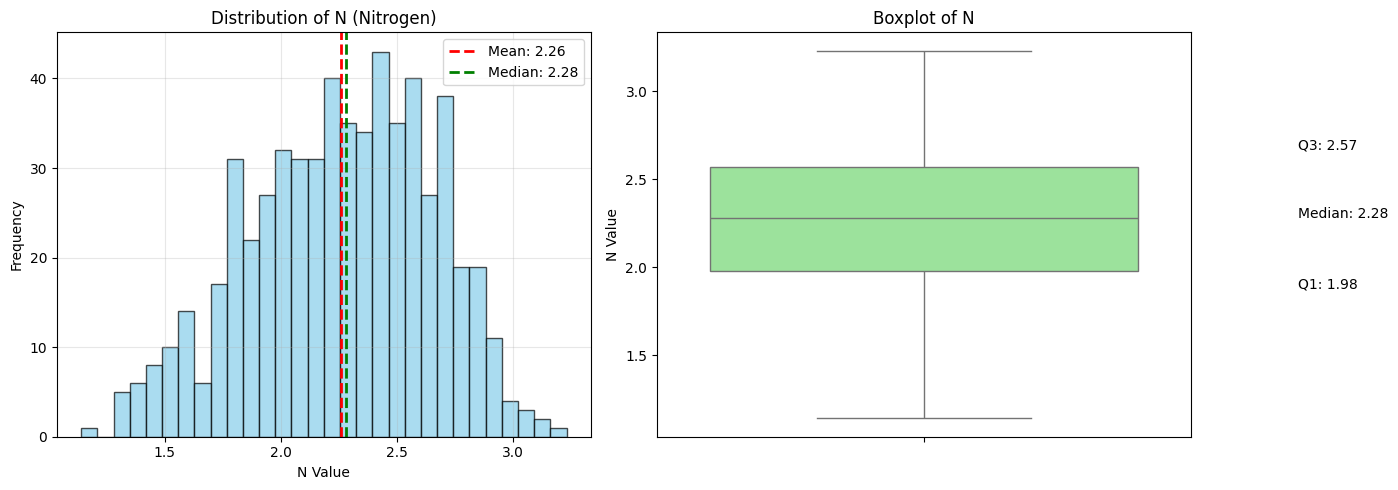


 Descriptive Statistics for N:
Count: 592
Mean: 2.258
Std: 0.396
Min: 1.140
25%: 1.980
50%: 2.280
75%: 2.570
Max: 3.230

 Outlier Analysis:
Lower bound: 1.095
Upper bound: 3.455
Number of outliers: 0
No outliers detected using IQR method


In [13]:
# PERBAIKAN KHUSUS UNTUK CORRELATION MATRIX DAN DISTRIBUSI TARGET

# 1. Pastikan data sudah bersih dan numerik
print("Memastikan data bersih dan numerik...")

# Buat copy dataframe untuk analisis
df_analysis = df_clean.copy()

# Pastikan semua kolom features dan target adalah numerik
for col in features + [target]:
    if col in df_analysis.columns:
        # Convert ke string dulu, lalu bersihkan, lalu ke numeric
        df_analysis[col] = df_analysis[col].astype(str)
        df_analysis[col] = df_analysis[col].str.replace(')', '', regex=False)
        df_analysis[col] = df_analysis[col].str.replace('(', '', regex=False)
        df_analysis[col] = df_analysis[col].str.replace(',', '', regex=False)
        df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

# Hapus baris dengan missing values
df_analysis = df_analysis.dropna()

print(f"Data analysis shape: {df_analysis.shape}")

# 2. Correlation Matrix (Fixed Version)
print("\nMembuat Correlation Matrix...")

plt.figure(figsize=(16, 12))

# Gunakan hanya kolom yang ada di dataframe
available_for_corr = [col for col in features + [target] if col in df_analysis.columns]

try:
    correlation_matrix = df_analysis[available_for_corr].corr()

    # Buat mask untuk segitiga atas
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix - Satellite Data Features', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Tampilkan korelasi tertinggi dengan target
    print("\nKorelasi dengan Nitrogen (N):")
    n_correlations = correlation_matrix['N'].sort_values(ascending=False)
    for feature, corr in n_correlations.items():
        if feature != 'N':
            print(f"  {feature}: {corr:.3f}")

except Exception as e:
    print(f"Error dalam correlation matrix: {e}")
    # Fallback - tampilkan korelasi sebagai tabel
    print("\nKorelasi dengan N (dalam tabel):")
    corr_with_n = df_analysis[available_for_corr].corr()['N'].sort_values(ascending=False)
    print(corr_with_n)

# 3. Distribusi Variabel Target (Fixed Version)
print(f"\nAnalisis Distribusi {target}:")

plt.figure(figsize=(14, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
plt.hist(df_analysis[target], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_analysis[target].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_analysis[target].mean():.2f}')
plt.axvline(df_analysis[target].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_analysis[target].median():.2f}')
plt.title(f'Distribution of {target} (Nitrogen)')
plt.xlabel(f'{target} Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_analysis[target], color='lightgreen')
plt.title(f'Boxplot of {target}')
plt.ylabel(f'{target} Value')

# Tambah statistik pada boxplot
stats = df_analysis[target].describe()
plt.text(0.7, stats['75%'] + 0.1, f"Q3: {stats['75%']:.2f}", fontsize=10)
plt.text(0.7, stats['25%'] - 0.1, f"Q1: {stats['25%']:.2f}", fontsize=10)
plt.text(0.7, stats['50%'], f"Median: {stats['50%']:.2f}", fontsize=10)

plt.tight_layout()
plt.show()

# 4. Tampilkan Statistik Deskriptif
print(f"\n Descriptive Statistics for {target}:")
print(f"Count: {df_analysis[target].count()}")
print(f"Mean: {df_analysis[target].mean():.3f}")
print(f"Std: {df_analysis[target].std():.3f}")
print(f"Min: {df_analysis[target].min():.3f}")
print(f"25%: {df_analysis[target].quantile(0.25):.3f}")
print(f"50%: {df_analysis[target].median():.3f}")
print(f"75%: {df_analysis[target].quantile(0.75):.3f}")
print(f"Max: {df_analysis[target].max():.3f}")

# 5. Check for Outliers
Q1 = df_analysis[target].quantile(0.25)
Q3 = df_analysis[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_analysis[(df_analysis[target] < lower_bound) | (df_analysis[target] > upper_bound)]
print(f"\n Outlier Analysis:")
print(f"Lower bound: {lower_bound:.3f}")
print(f"Upper bound: {upper_bound:.3f}")
print(f"Number of outliers: {len(outliers)}")

if len(outliers) > 0:
    print("Outlier values:")
    print(outliers[target].values)
else:
    print("No outliers detected using IQR method")

=== DATA PREPARATION FOR OLS ===
Data shape after cleaning: (592, 34)
Available features for OLS: 16
Features: ['P', 'K', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn', 'B', 'Sigma_VV', 'Sigma_VH', 'b1', 'b2', 'b3', 'b4', 'b5']
X dtype: P           float64
K           float64
Ca          float64
Mg          float64
Fe          float64
Mn          float64
Cu          float64
Zn          float64
B           float64
Sigma_VV    float64
Sigma_VH    float64
b1          float64
b2          float64
b3          float64
b4          float64
b5          float64
dtype: object
y dtype: float64
X shape: (592, 16), y shape: (592,)
Missing values in X: 0
Missing values in y: 0

=== OLS REGRESSION WITH STATSMODELS ===
                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:           

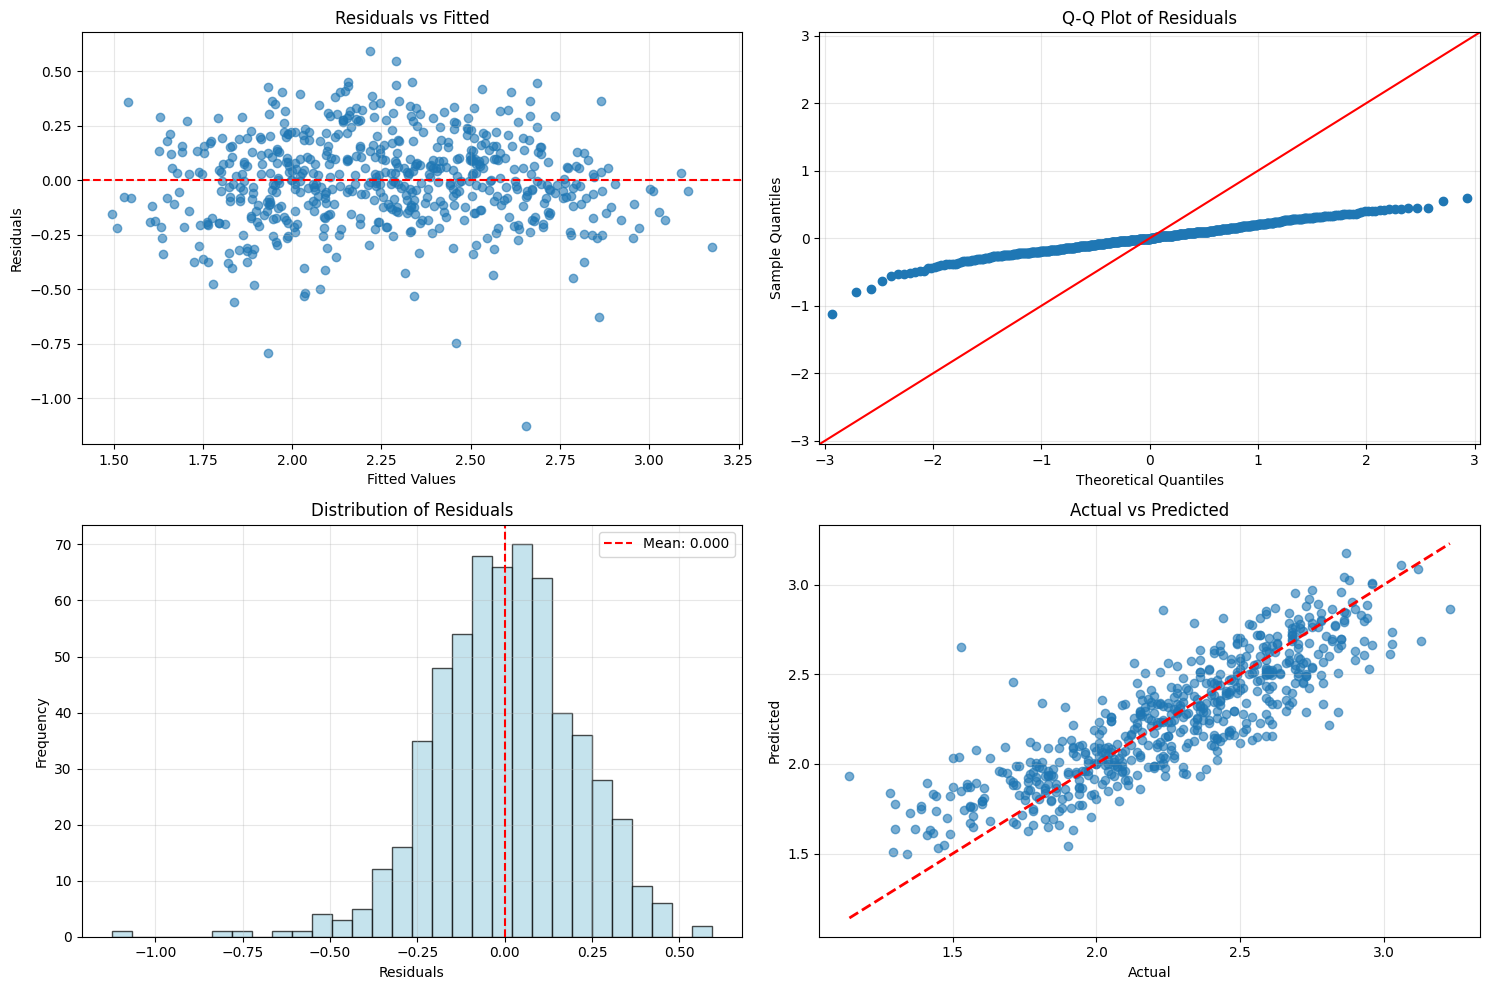

 OLS diagnostic plots created successfully!

=== OLS MODEL INTERPRETATION ===
 OLS Model Performance:
• R-squared: 0.7298
• Adjusted R-squared: 0.7222
• F-statistic: 97.05
• Prob (F-statistic): 0.0000

 Model Significance:
 Model is statistically significant (p < 0.05)

 Feature Analysis:
• Total features: 16
• Statistically significant features (p < 0.05): 9

 Significant Features (p < 0.05):
   P: coef = 9.2894, p-value = 0.0000
   Ca: coef = -0.0628, p-value = 0.0096
   Fe: coef = 0.0010, p-value = 0.0000
   Mn: coef = 0.0003, p-value = 0.0000
   Cu: coef = 0.0182, p-value = 0.0022
   Zn: coef = 0.0032, p-value = 0.0159
   b3: coef = -2.8999, p-value = 0.0048
   b5: coef = 1.3186, p-value = 0.0000

 Most Positive Influences:
   P: 9.2894
   b5: 1.3186
   b2: 1.0652

 Most Negative Influences:
   b3: -2.8999
   Sigma_VV: -0.2231
   Mg: -0.0874

📝 Summary:
OLS analysis completed with 16 features
Sample size: 592 observations


In [15]:
# PERBAIKAN KHUSUS UNTUK OLS REGRESSION

print("=== DATA PREPARATION FOR OLS ===")

# 1. Pastikan semua data numerik dan bersih
def clean_data_for_ols(df, features, target):
    """Bersihkan data untuk memastikan semua numerik"""
    df_clean = df.copy()

    # Clean target variable
    df_clean[target] = pd.to_numeric(df_clean[target].astype(str).str.replace(')', '').str.replace('(', ''), errors='coerce')

    # Clean features
    for feature in features:
        if feature in df_clean.columns:
            df_clean[feature] = pd.to_numeric(df_clean[feature].astype(str).str.replace(')', '').str.replace('(', ''), errors='coerce')

    # Drop rows dengan missing values
    df_clean = df_clean.dropna(subset=[target] + features)

    return df_clean

# Apply cleaning
df_ols_clean = clean_data_for_ols(df, features, target)
print(f"Data shape after cleaning: {df_ols_clean.shape}")

# 2. Pastikan hanya menggunakan features yang tersedia
available_features = [f for f in features if f in df_ols_clean.columns]
print(f"Available features for OLS: {len(available_features)}")
print(f"Features: {available_features}")

# 3. Konversi eksplisit ke float untuk memastikan tipe data numerik
X = df_ols_clean[available_features].astype(float)
y = df_ols_clean[target].astype(float)

print(f"X dtype: {X.dtypes}")
print(f"y dtype: {y.dtype}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# 4. Cek jika ada missing values setelah konversi
print(f"Missing values in X: {X.isna().sum().sum()}")
print(f"Missing values in y: {y.isna().sum()}")

# 5. Add constant dan run OLS dengan error handling
try:
    X = sm.add_constant(X)  # Add intercept

    print("\n=== OLS REGRESSION WITH STATSMODELS ===")
    ols_model = sm.OLS(y, X).fit()

    # Print results
    print(ols_model.summary())

except Exception as e:
    print(f"Error in OLS: {e}")
    print("\nTrying alternative approach...")

    # Alternative approach: konversi manual ke numpy array
    X_array = X.values.astype(float)
    y_array = y.values.astype(float)

    # Pastikan tidak ada NaN
    mask = ~np.isnan(X_array).any(axis=1) & ~np.isnan(y_array)
    X_array = X_array[mask]
    y_array = y_array[mask]

    # Add constant
    X_array = sm.add_constant(X_array)

    ols_model = sm.OLS(y_array, X_array).fit()
    print(ols_model.summary())

# 6. Diagnostic plots dengan error handling
try:
    fig = plt.figure(figsize=(15, 10))

    # Residuals vs Fitted
    ax1 = fig.add_subplot(2, 2, 1)
    fitted_values = ols_model.fittedvalues
    residuals = ols_model.resid
    ax1.scatter(fitted_values, residuals, alpha=0.6)
    ax1.axhline(y=0, color='red', linestyle='--')
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Fitted')
    ax1.grid(True, alpha=0.3)

    # Q-Q plot
    ax2 = fig.add_subplot(2, 2, 2)
    sm.qqplot(residuals, line='45', ax=ax2)
    ax2.set_title('Q-Q Plot of Residuals')
    ax2.grid(True, alpha=0.3)

    # Distribution of residuals
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.hist(residuals, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    ax3.axvline(residuals.mean(), color='red', linestyle='--', label=f'Mean: {residuals.mean():.3f}')
    ax3.set_xlabel('Residuals')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of Residuals')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Actual vs Predicted
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.scatter(y, fitted_values, alpha=0.6)
    ax4.plot([y.min(), y.max()], [y.min(), y.max()], 'red', linestyle='--', linewidth=2)
    ax4.set_xlabel('Actual')
    ax4.set_ylabel('Predicted')
    ax4.set_title('Actual vs Predicted')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(" OLS diagnostic plots created successfully!")

except Exception as e:
    print(f"Error creating diagnostic plots: {e}")

# 7. Model Interpretation
print("\n=== OLS MODEL INTERPRETATION ===")
print("="*50)

if 'ols_model' in locals():
    # Significant features
    significant_features = ols_model.pvalues[ols_model.pvalues < 0.05]

    print(f" OLS Model Performance:")
    print(f"• R-squared: {ols_model.rsquared:.4f}")
    print(f"• Adjusted R-squared: {ols_model.rsquared_adj:.4f}")
    print(f"• F-statistic: {ols_model.fvalue:.2f}")
    print(f"• Prob (F-statistic): {ols_model.f_pvalue:.4f}")

    print(f"\n Model Significance:")
    if ols_model.f_pvalue < 0.05:
        print(" Model is statistically significant (p < 0.05)")
    else:
        print("  Model is not statistically significant")

    print(f"\n Feature Analysis:")
    print(f"• Total features: {len(available_features)}")
    print(f"• Statistically significant features (p < 0.05): {len(significant_features)}")

    if len(significant_features) > 0:
        print("\n Significant Features (p < 0.05):")
        for feature, pval in significant_features.items():
            if feature != 'const':
                coef = ols_model.params[feature]
                print(f"   {feature}: coef = {coef:.4f}, p-value = {pval:.4f}")

    # Top features by coefficient magnitude
    coefficients = ols_model.params.drop('const', errors='ignore')
    if len(coefficients) > 0:
        top_positive = coefficients.nlargest(3)
        top_negative = coefficients.nsmallest(3)

        print(f"\n Most Positive Influences:")
        for feature, coef in top_positive.items():
            print(f"   {feature}: {coef:.4f}")

        print(f"\n Most Negative Influences:")
        for feature, coef in top_negative.items():
            print(f"   {feature}: {coef:.4f}")

print(f"\n📝 Summary:")
print(f"OLS analysis completed with {len(available_features)} features")
print(f"Sample size: {len(y)} observations")


Additional Analysis:
Mean Absolute Error: 0.1543

Feature Importance (by absolute coefficient value):
 Feature  Absolute_Coefficient
       P              9.327964
      b3              3.877553
      b2              1.495984
      b5              1.413276
      b4              0.761642
Sigma_VV              0.422585
      b1              0.384877
      Ca              0.080738
       K              0.072746
      Mg              0.050591
      Cu              0.018729
Sigma_VH              0.004945
      Zn              0.003323
       B              0.001886
      Fe              0.000897
      Mn              0.000257

Model Interpretation:
The model explains a moderate amount of variance in the target variable

Most positive influences:
  P: 9.3280
  b2: 1.4960
  b5: 1.4133

Most negative influences:
  b3: -3.8776
  Sigma_VV: -0.4226
  Ca: -0.0807

Summary: Multiple regression completed with 16 features
Model performance: R2 = 0.6852, RMSE = 0.2198


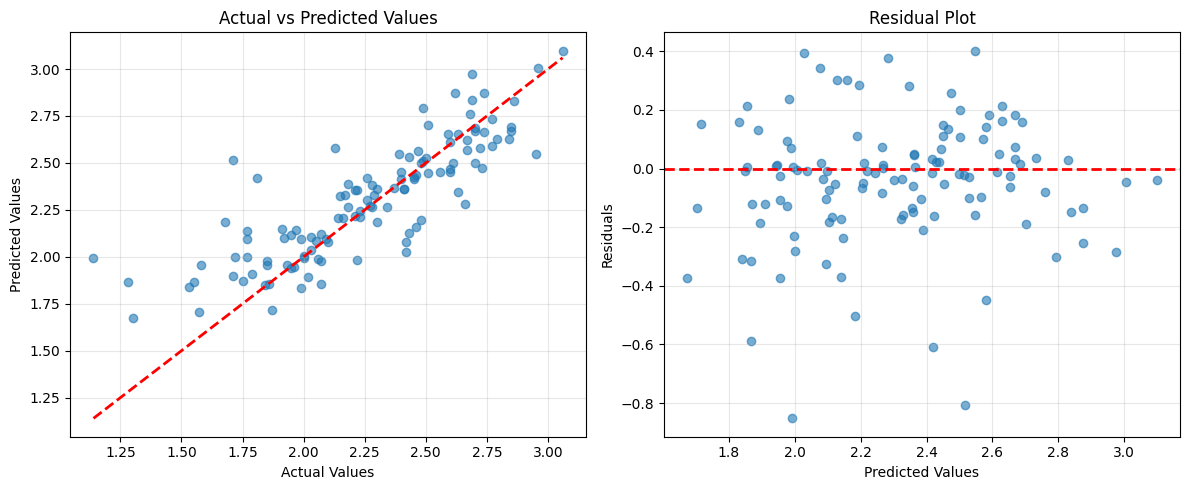


Performance Metrics Summary:
R-squared (R2): 0.6852
Adjusted R-squared: 0.6358
Mean Absolute Error (MAE): 0.1543
Root Mean Square Error (RMSE): 0.2198
Mean Square Error (MSE): 0.0483

Key Insights from Model Coefficients:
Positive relationships (increase N):
  P: +9.3280 units per unit increase
  b2: +1.4960 units per unit increase
  b5: +1.4133 units per unit increase

Negative relationships (decrease N):
  b3: -3.8776 units per unit increase
  Sigma_VV: -0.4226 units per unit increase
  Ca: -0.0807 units per unit increase


In [20]:
# PERBAIKAN UNTUK BAGIAN ADDITIONAL ANALYSIS

# Import library yang diperlukan
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 10. Additional analysis
print("\nAdditional Analysis:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")

# Feature importance berdasarkan absolute coefficient values
feature_importance = pd.DataFrame({
    'Feature': available_features,
    'Absolute_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Absolute_Coefficient', ascending=False)

print("\nFeature Importance (by absolute coefficient value):")
print(feature_importance.to_string(index=False))

# 11. Model interpretation
print("\nModel Interpretation:")
if r2 > 0.7:
    print("The model explains a high amount of variance in the target variable")
elif r2 > 0.5:
    print("The model explains a moderate amount of variance in the target variable")
elif r2 > 0.3:
    print("The model explains a low amount of variance in the target variable")
else:
    print("The model explains very little variance in the target variable")

# Identify most influential features
top_positive = coefficients_df.nlargest(4, 'Coefficient')
top_negative = coefficients_df.nsmallest(4, 'Coefficient')

if len(top_positive) > 1:  # Exclude intercept
    print("\nMost positive influences:")
    for _, row in top_positive.head(3).iterrows():
        if row['Feature'] != 'Intercept':
            print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

if len(top_negative) > 0:
    print("\nMost negative influences:")
    for _, row in top_negative.head(3).iterrows():
        if row['Feature'] != 'Intercept':
            print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

print(f"\nSummary: Multiple regression completed with {len(available_features)} features")
print(f"Model performance: R2 = {r2:.4f}, RMSE = {rmse:.4f}")

# 12. Visualisasi hasil prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 13. Performance metrics summary
print("\nPerformance Metrics Summary:")
print(f"R-squared (R2): {r2:.4f}")
print(f"Adjusted R-squared: {1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(available_features) - 1):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Square Error (MSE): {mse:.4f}")

# 14. Interpretation of key features
print("\nKey Insights from Model Coefficients:")
print("Positive relationships (increase N):")
positive_features = coefficients_df[coefficients_df['Coefficient'] > 0].nlargest(3, 'Coefficient')
for _, row in positive_features.iterrows():
    if row['Feature'] != 'Intercept':
        print(f"  {row['Feature']}: +{row['Coefficient']:.4f} units per unit increase")

print("\nNegative relationships (decrease N):")
negative_features = coefficients_df[coefficients_df['Coefficient'] < 0].nsmallest(3, 'Coefficient')
for _, row in negative_features.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f} units per unit increase")

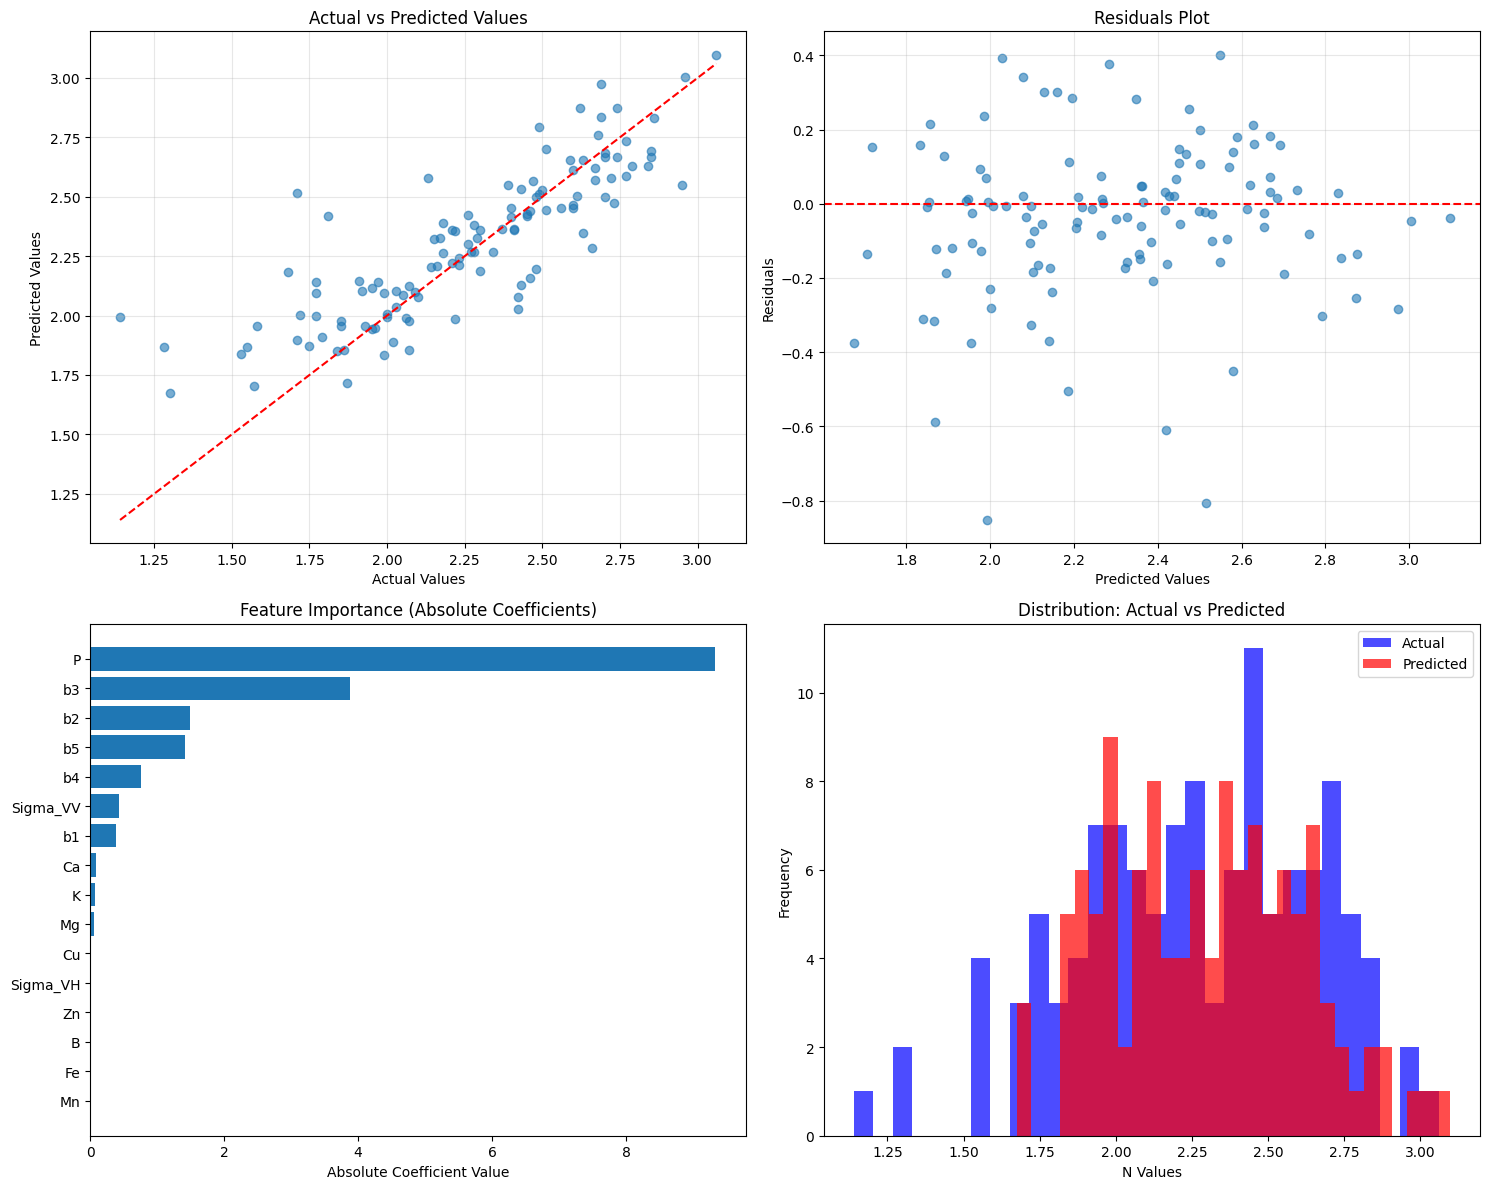

In [21]:
# Visualisasi hasil
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')
axes[0, 0].grid(True, alpha=0.3)

# Residuals plot
residuals_sklearn = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals_sklearn, alpha=0.6)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': np.abs(lr_model.coef_)
}).sort_values('coefficient', ascending=True)

axes[1, 0].barh(feature_importance['feature'], feature_importance['coefficient'])
axes[1, 0].set_xlabel('Absolute Coefficient Value')
axes[1, 0].set_title('Feature Importance (Absolute Coefficients)')

# Distribution of predictions vs actual
axes[1, 1].hist(y_test, bins=30, alpha=0.7, label='Actual', color='blue')
axes[1, 1].hist(y_pred, bins=30, alpha=0.7, label='Predicted', color='red')
axes[1, 1].set_xlabel('N Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution: Actual vs Predicted')
axes[1, 1].legend()

plt.tight_layout()
plt.show()